In [1]:
#this takes the difference between 2 sensors for all possible combinations. Returns a df sorted by distance
def spatialchanges (df, latlons, direction=True, radians=False):

    def combine(arr, s): 
        return list(combinations(arr, s)) 
    
    
    ########this is for direction 
    
    if (direction==True):
    
        if (radians==True):
            df=df*180/math.pi
    
    columns=np.arange(0,len(df.T))
    N=len(combine(columns, 2))
    lists=np.empty((N, 0)).tolist()
    distances=np.empty((N, 0)).tolist()
    k=0
    
    for i in columns:
        totalcombinations=len(df.T)-i
        for j in range (1, totalcombinations):
            lists[k]=np.abs(df.iloc[:,i]-df.iloc[:,i+j])
            distances[k]=distance.distance(latlons[i],latlons[i+j]).m
            k=k+1

    newdf=pd.DataFrame(lists, index=np.round(distances,decimals=2))

    #fixes the angles
    M=len(newdf)
    for x in range (0,M):
        for y in (np.where(lists[x]>180)):
            newdf.iloc[x,y]=360-newdf.iloc[x,y]
        for y in (np.where(lists[x]<0)):
            newdf.iloc[x,y]=newdf.iloc[x,y]+360
    
    return newdf.sort_index(ascending=True).T
    
    ########this is for speed - nothing changes except no angle fixing
    if (direction==False):
        
        columns=np.arange(0,len(df.T))
        N=len(combine(columns, 2))
        lists=np.empty((N, 0)).tolist()
        distances=np.empty((N, 0)).tolist()
        k=0
    
        for i in columns:
            totalcombinations=len(df.T)-i
            for j in range (1, totalcombinations):
                lists[k]=np.abs(df.iloc[:,i]+df.iloc[:,i+j])/2
                distances[k]=distance.distance(latlons[i],latlons[i+j]).m
                k=k+1

        newdf=pd.DataFrame(lists, index=np.round(distances,decimals=2))    
        
    return newdf.sort_index(ascending=True).T

In [2]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import astropy
from astropy import stats
import geopy
from geopy import distance
import math
from itertools import combinations

import scipy
from scipy import signal

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [606]:
#this takes the difference between 2 sensors for all possible combinations. Returns a df sorted by distance
def spatialchanges (direction=dir_df, speed=speed_df, gps=latlons, radians=False):

    def combine(arr, s): 
        return list(combinations(arr, s)) 
    
    
    ########this is for direction 
    
    if (radians==True):
        dir_df=dir_df*180/math.pi
    
    columns=np.arange(0,len(dir_df.T))
    N=len(combine(columns, 2))
    lists=np.empty((N, 0)).tolist()
    distances=np.empty((N, 0)).tolist()
    k=0
    
    for i in columns:
        totalcombinations=len(dir_df.T)-i
        for j in range (1, totalcombinations):
            lists[k]=np.abs(dir_df.iloc[:,i]-dir_df.iloc[:,i+j])
            distances[k]=distance.distance(latlons[i],latlons[i+j]).m
            k=k+1

    newdir_df=pd.DataFrame(lists, index=np.round(distances,decimals=2))

    #fixes the angles
    M=len(newdir_df)
    for x in range (0,M):
        for y in (np.where(lists[x]>180)):
            newdir_df.iloc[x,y]=360-newdir_df.iloc[x,y]
        for y in (np.where(lists[x]<0)):
            newdir_df.iloc[x,y]=newdir_df.iloc[x,y]+360
    
    newdir_df=newdir_df.sort_index(ascending=True).T
    #return newdir_df.sort_index(ascending=True).T
    
    ########this is for speed - nothing changes except no angle fixing
        
    columns_1=np.arange(0,len(speed_df.T))
    N_1=len(combine(columns_1, 2))
    lists_1=np.empty((N_1, 0)).tolist()
    distances_1=np.empty((N_1, 0)).tolist()
    k=0
    
    for i in columns_1:
        totalcombinations_1=len(speed_df.T)-i
        for j in range (1, totalcombinations_1):
            lists_1[k]=(np.abs(speed_df.iloc[:,i]+speed_df.iloc[:,i+j])/2)
            distances_1[k]=distance.distance(latlons[i],latlons[i+j]).m
            k=k+1

    newspeed_df=pd.DataFrame(lists_1, index=np.round(distances_1,decimals=2))
    newspeed_df=newspeed_df.sort_index(ascending=True).T
    return (newdir_df, newspeed_df)

In [1008]:
#this takes the difference between 2 sensors for all possible combinations. Returns a df sorted by distance
def spatialchanges_alt (dir_df, speed_df, latlons, radians=False):

    def combine(arr, s): 
        return list(combinations(arr, s)) 
    
    
    ########this is for direction 
    
    if (radians==False):
        dir_df=dir_df*math.pi/180
    
    columns=np.arange(0,len(dir_df.T))
    N=len(combine(columns, 2))
    lists=np.empty((N, 0)).tolist()
    distances=np.empty((N, 0)).tolist()
    k=0
    
    for i in columns:
        totalcombinations=len(dir_df.T)-i
        for j in range (1, totalcombinations):
            data=np.array([dir_df.iloc[:,i],dir_df.iloc[:,i+j]])
            lists[k]=scipy.stats.circmean(data, axis=0)*180/math.pi #computes mean between 2 sensors at each time recording
            distances[k]=distance.distance(latlons[i],latlons[i+j]).m #distance between 2 sensor in meters
            k=k+1

    newdir_df=pd.DataFrame(lists, index=np.round(distances,decimals=2))
    newdir_df=newdir_df.sort_index(ascending=True).T

    ########this is for speed - nothing changes except no angle fixing
        
    columns_1=np.arange(0,len(speed_df.T))
    N_1=len(combine(columns_1, 2))
    lists_1=np.empty((N_1, 0)).tolist()
    distances_1=np.empty((N_1, 0)).tolist()
    k=0
    
    for i in columns_1:
        totalcombinations_1=len(speed_df.T)-i
        for j in range (1, totalcombinations_1):
            lists_1[k]=speed_df.iloc[:,i]-speed_df.iloc[:,i+j]
            distances_1[k]=distance.distance(latlons[i],latlons[i+j]).m
            k=k+1

    newspeed_df=pd.DataFrame(lists_1, index=np.round(distances_1,decimals=2))
    newspeed_df=newspeed_df.sort_index(ascending=True).T
    return (newdir_df, newspeed_df)

In [17]:
#split speed and difference dfs so that you can find averages on different time chunks
def split_df(df, chunk_size = 18000): #default chunks are 30 min
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks 

def avg_df(chunks):
    avg_df=pd.DataFrame(index=chunks[0].columns)
    N=len(chunks)
    testdf=np.empty((N, 0)).tolist()
    for i in range(0,N):
        testdf[i]=pd.DataFrame(chunks[i].mean(), columns=[i])
        avg_df=pd.concat([avg_df, testdf[i]], axis=1)
    return avg_df

def std_df(chunks):
    N=len(chunks)
    testdf=np.empty((N, 0)).tolist()
    for i in range (0,N):
        testdf[i]=np.std(chunks[i])
    return testdf    

def dir_vs_speed(directionaldf, speeddf):
    dir_chunks=split_df(directionaldf)
    speeds=split_df(speeddf)
    avg_dir=avg_df(dir_chunks)
    avg_speed=avg_df(speeds)
    avgspeeds=list(np.array(avg_speed.mean()))
    avg_dir.columns=avgspeeds
    #newdf=avg_dir.T.sort_index(ascending=True)
    newdf=avg_dir
    return newdf

In [1021]:
def avg_df_dir(chunks):
    avg_df=pd.DataFrame(index=chunks[0].columns)
    N=len(chunks)
    testdf=np.empty((N, 0)).tolist()
    for i in range(0,N):
        testdf[i]=pd.DataFrame(scipy.stats.circmean(chunks[i]*math.pi/180)*(180/math.pi), columns=[i])
        avg_df=pd.concat([avg_df, testdf[i]], axis=1)
    return avg_df



In [821]:
RAWS=pd.read_excel('/Users/jomammahoule1993/Desktop/RAWS/5.1.22_RAWS.xls',  names=['Date time',  'Mean Wind Speed', 'Wind Vector Magnitude', 'Mean Wind Direction', 'Std Deviation of Wind Direction', 'Mean Wind Speed 100ft', 'Wind Vector Speed 100ft', 'Wind Direction 100ft', 'Std Dev of Wind Direction 100ft' ])

In [1239]:
df1=pd.read_hdf('/Users/jomammahoule1993/Downloads/Small_10.20.20windgps_data.hdf', key='/windgps')

In [6]:
distance.distance((39.545105,-119.8423),(39.54509, -119.842285)).m

2.1061781907609225

In [7]:
import math
dx = (-119.8423--119.842285)*40000*math.cos((39.545105+39.54509)*math.pi/360)/360
dy = (39.545105-39.54509)*40000/360

In [10]:
def arc_to_deg(arc):
    """convert spherical arc length [m] to great circle distance [deg]"""
    return float(arc)/6371/1000 * 180/math.pi

def deg_to_arc(deg):
    """convert great circle distance [deg] to spherical arc length [m]"""
    return float(deg)*6371*1000 * math.pi/180

def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [14]:
x1,y1,z1=latlon_to_xyz(39.545105,-119.8423)

In [15]:
x2,y2,z2=latlon_to_xyz(39.54509, -119.842285)

In [18]:
np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)*1000

2.1062331000216417

In [3]:

#probably a quicker way to do this? need to then copy these values so that they aren't type pd
#cords1=(lld.lat_1.mode(), lld.lon_1.mode())
#cord2=(lld.lat_2.mode(), lld.lon_2.mode())
#cord3=(lld.lat_3.mode(), lld.lon_3.mode())
#cord4=(lld.lat_4.mode(), lld.lon_4.mode())
#cord5=(lld.lat_5.mode(), lld.lon_5.mode())
#cord6=(lld.lat_6.mode(), lld.lon_6.mode())
#cord7=(lld.lat_7.mode(), lld.lon_7.mode())
#cord8=(lld.lat_8.mode(), lld.lon_8.mode())
#cord9=(lld.lat_9.mode(), lld.lon_9.mode())

#previous coordinates already found:
#--------------------------------------
#backyard9.26.21
B1_A=(39.545105,-119.8423)
B1_B=(39.54509, -119.842285)
B1_C=(39.545055,-119.842339)
B1_D=(39.544998, -119.8423)
B1_E=(39.545033, -119.84227)
B1_F=(39.544991, -119.842209)
B1_G=(39.544952, -119.842232)
#cord8=(39.544998, -119.842201)
#cord9=(39.545105, -119.8423)

#backyard 10/30/21
B2_A=(39.526119, -119.80098)
B2_B=(39.526142, -119.800926)
B2_C=(39.526161, -119.800964)
B2_D=(39.526222, -119.800995)
B2_E=(39.526207, -119.801056)
B2_F=(39.526249, -119.800941)
B2_G=(39.526302, -119.800941)
#cord8=(39.526321, -119.800949)
#cord9=(39.526119, -119.80098)

#backyard 1/8/22
B3_A=(39.526119, -119.800926)
B3_B=(39.526142, -119.800926)
B3_C=(39.526169, -119.80098)
B3_E=(39.526211, -119.801041)
B3_F=(39.526207, -119.80098)
B3_G=(39.526314, -119.800911)
#cord8=(39.526302, -119.800941)
#cord9=(39.526104, -119.800911)

#backyard 4/30/22-5/2/22
B4_A=(39.512798, -119.839996)
B4_B=(39.51276, -119.840096)
B4_C=(39.512848, -119.839996)
#B4_D=(39.512913, -119.840065)
B4_E=(39.512913, -119.840065)
B4_F=(39.512718, -119.84021)
B4_H=(39.51268, -119.840431)
#B4_I=(39.512672, -119.840431)


#---------------------------------------
#forest7.7.21 #newdf.D_8RAD_hat=(newdf.D_8RAD_hat-.4)
F1_A=(39.252392, -119.878174)
F1_B=(39.252400, -119.878358)
F1_C=(39.252410, -119.878288)
F1_E=(39.252399, -119.878464)
F1_F=(39.252296, -119.878082)
#cord8=(39.252159, -119.878052)
F1_I=(39.252064, -119.878036)


#forest10.29.21
F2_A=(39.388817, -120.10006)
F2_B=(39.388992, -120.100044)
F2_C=(39.389065, -120.100044)
F2_E=(39.389080, -120.099907)
F2_F=(39.389090, -120.099777)
F2_G=(39.389088, -120.099678)
#cord8=(39.389103, -120.099731)
#cord9=(39.388817, -120.10006)


#--------------------------------------------
#desert 10/20/20
D_A=(40.793633,-119.15789)
D_B=(40.793552, -119.15731)
D_D=(40.793968, -119.157166)
D_E=(40.793762, -119.1576)
D_F= (40.794167, -119.157341)
D_G= (40.793968, -119.157791)
D_H= (40.793865, -119.158051)
D_I= (40.793713, -119.156952)

#Lemmon 1.11.22
L1_A=(39.67672,-119.795753)
L1_B=(39.676785, -119.795837)
L1_C=(39.676865, -119.795982)
L1_D=(39.676975, -119.796158)
L1_E=(39.6772, -119.796516)
L1_F= (39.676769, -119.795677)
L1_G= (39.676975, -119.795486)
#cord8= (39.676975, -119.795486)
#cord9= (39.67672, -119.795753)

#lemmon 1/15/22
L2_A=(39.67857,-119.794373)
L2_B=(39.678478, -119.794411)
L2_C=(39.678226, -119.794479)
L2_D=(39.677929, -119.794563)
L2_E=(39.677471, -119.794662)
L2_F= (39.67852, -119.794037)
L2_G= (39.678471, -119.793777)
#cord8= (39.678467, -119.793777)
#cord9= (39.678585, -119.794373)

#lemmon 6/1/22
L3_A=(39.678631, -119.794334)
L3_B=(39.67852, -119.79438)
L3_C=(39.678295, -119.794479)
L3_E=(39.677921, -119.79464)
L3_F=(39.677418, -119.794861)
L3_G=(39.678577, -119.794014)
L3_H=(39.678513, -119.793518)

#lemmon 6/3/22
L4_B=(39.67857, -119.794365)
L4_C=(39.678295, -119.794411)
L4_E=(39.677807, -119.794472)
L4_F=(39.677326, -119.794525)
L4_G=(39.678665, -119.794098)
L4_H=(39.678528, -119.793663)

#forest 6/7/22-6/8/22
F3_B=(39.247462, -119.876435)
F3_E=(39.247155, -119.876133)
F3_F=(39.246921, -119.876330)
F3_G=(39.246664, -119.876518)
F3_H=(39.248047,-119.876488)
#F3_I=(39.248009, -119.87648)

In [514]:
#backyard 1/8/22
B3_A=(39.526119, -119.800926)
B3_B=(39.526142, -119.800926)
B3_C=(39.526169, -119.80098)
B3_E=(39.526211, -119.801041)
B3_F=(39.526207, -119.80098)
B3_G=(39.526314, -119.800911)

In [ ]:
#Desert/LemmonV
D_speeds=df1[["S2_1", "S2_2", "S2_4", "S2_5", "S2_6", "S2_7", "S2_8", "S2_9"]]
D_dir=df1[["D_1", "D_2", "D_4", "D_5", "D_6", "D_7", "D_8", "D_9"]]
D_latlons=[D_A, D_B, D_D, D_E,D_F,D_G,D_H,D_I]

L1_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_4", "S2_5", "S2_6", "S2_7"]]
L1_dir=df1[["D_1", "D_2", "D_3", "D_4", "D_5", "D_6", "D_7"]]
L1_latlons=[L1_A,L1_B,L1_C,L1_D,L1_E,L1_F,L1_G]

L2_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_4", "S2_5", "S2_6", "S2_7"]]
L2_dir=df1[["D_1", "D_2", "D_3", "D_4", "D_5", "D_6", "D_7"]]
L2_latlons=[L2_A,L2_B,L2_C,L2_D,L2_E,L2_F,L2_G]

#Backyard
B1_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_4", "S2_5", "S2_6", "S2_7"]]
B1_dir=df1[["D_1", "D_2", "D_3", "D_4", "D_5", "D_6", "D_7"]]
B1_latlons=[B1_A,B1_B,B1_C,B1_D,B1_E, B1_F, B1_G]


B2_latlons=[B2_A,B2_B,B2_C,B2_D,B2_E, B2_F, B2_G]
B2_dir=df1[["D_1", "D_2", "D_3", "D_4", "D_5", "D_6", "D_7"]]
B2_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_4", "S2_5", "S2_6", "S2_7"]]


B3_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_7"]]
B3_dir=df1[["D_1", "D_2", "D_3", "D_5", "D_6", "D_7"]]
B3_latlons=[B3_A,B3_B,B3_C, B3_E, B3_F, B3_G]


#Forest
F1_dir=df1[["D_1", "D_2", "D_3", "D_5", "D_6", "D_9"]]
F1_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_9"]]
F1_latlons=[F1_A, F1_B, F1_C, F1_E, F1_F, F1_I]

F2_dir=df1[["D_1", "D_2", "D_3", "D_5", "D_6", "D_7"]]
F2_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_7"]]
F2_latlons=[F2_A, F2_B, F2_C, F2_E, F2_F, F2_G]

#Backyard 4.30.22 + 5.1.22
B4_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_8"]]
B4_dir=df1[["D_1", "D_2", "D_3", "D_5", "D_6", "D_8"]]
B4_latlons=[B4_A, B4_B, B4_C, B4_E, B4_F, B4_H]

#Backyard 5.2.22
B5_speeds=df1[["S2_1", "S2_2", "S2_5", "S2_6", "S2_8"]]
B5_dir=df1[["D_1", "D_2", "D_5", "D_6", "D_8"]]
B5_latlons=[B4_A, B4_B, B4_E, B4_F, B4_H]


B4a_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_8"]]
B4a_dir=df1[["D_1", "D_2", "D_3", "D_5", "D_6", "D_8"]]
B4a_latlons=[B4_A, B4_B, B4_C, B4_E, B4_F, B4_H]


#4.30.22 day only
B4a_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_8"]]
B4a_dir=df1[["D_1", "D_2", "D_3", "D_5", "D_6", "D_8"]]
B4a_latlons=[B4_A, B4_B, B4_C, B4_E, B4_F, B4_H]

#5.1.22 day only

B4b_speeds=dfB[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_8"]]
B4b_dir=dfB[["D_1", "D_2", "D_3", "D_5", "D_6", "D_8"]]
B4b_latlons=[cords1,cord2,cord3,cord5,cord6,cord8]

#6.1.22
L3_speeds=df1[["S2_1", "S2_2", "S2_3", "S2_5", "S2_6", "S2_7", "S2_8"]]
L3_dir=df1[["D_1", "D_2", "D_3", "D_5", "D_6", "D_7", "D_8"]]
L3_latlons=[L3_A,L3_B,L3_C,L3_E,L3_F,L3_G, L3_H]

#6.3.22
L4_speeds=df1[[ "S2_2", "S2_3", "S2_5", "S2_6", "S2_7", "S2_8"]]
L4_dir=df1[[ "D_2", "D_3", "D_5", "D_6", "D_7", "D_8"]]
L4_latlons=[L4_B,L4_C,L4_E,L4_F,L4_G, L4_H]

#6.8.22
F3_speeds=df1_day2[[ "S2_2", "S2_5", "S2_6", "S2_7", "S2_8"]]
F3_dir=df1_day2[[ "D_2", "D_5", "D_6", "D_7", "D_8"]]
F3_latlons=[F3_B,F3_E,F3_F, F3_G, F3_H]

In [1240]:
#choose relevant params
D_speeds=df1[["S2_1", "S2_2", "S2_4", "S2_5", "S2_6", "S2_7", "S2_8", "S2_9"]]
D_dir=df1[["D_1", "D_2", "D_4", "D_5", "D_6", "D_7", "D_8", "D_9"]]
D_latlons=[D_A, D_B, D_D, D_E,D_F,D_G,D_H,D_I]



In [4]:
D_latlons=[D_A, D_B, D_D, D_E,D_F,D_G,D_H,D_I]

In [5]:
D_latlons

[(40.793633, -119.15789),
 (40.793552, -119.15731),
 (40.793968, -119.157166),
 (40.793762, -119.1576),
 (40.794167, -119.157341),
 (40.793968, -119.157791),
 (40.793865, -119.158051),
 (40.793713, -119.156952)]

In [824]:
RAWS1=split_df(RAWS[['Std Deviation of Wind Direction']], chunk_size=3)
RAWS2=split_df(RAWS[['Mean Wind Speed']], chunk_size=3)
RAWS3=split_df(RAWS[['Std Dev of Wind Direction 100ft']], chunk_size=3)
RAWS4=split_df(RAWS[['Mean Wind Speed 100ft']], chunk_size=3)

In [825]:
RAWS1=avg_df(RAWS1)
RAWS2=std_df(RAWS2)
RAWS3=avg_df(RAWS3)
RAWS4=std_df(RAWS4)

In [826]:
RAWS1=RAWS1.T
RAWS1=RAWS1.dropna()
RAWS1

,Std Deviation of Wind Direction
0,54.943333
1,44.790000
2,40.736667
3,41.173333
4,46.356667
5,46.700000
6,39.876667
7,41.333333
8,38.976667
9,53.700000


In [827]:
RAWS2=pd.DataFrame(RAWS2)
RAWS2=RAWS2.dropna()
RAWS2

,Mean Wind Speed
0,0.178496
1,0.082304
2,0.047542
3,0.130132
4,0.375440
5,0.093081
6,0.246801
7,0.247206
8,0.255809
9,0.225247


In [828]:
RAWS3=RAWS3.T.dropna()
RAWS3

,Std Dev of Wind Direction 100ft
0,27.820000
1,37.150000
2,24.120000
3,31.120000
4,20.713333
5,26.696667
6,21.213333
7,24.583333
8,23.086667
9,28.773333


In [829]:
RAWS4=pd.DataFrame(RAWS4)
RAWS4=RAWS4.dropna()
RAWS4

,Mean Wind Speed 100ft
0,0.233333
1,0.388081
2,0.213167
3,0.353582
4,0.471257
5,0.298441
6,0.223378
7,0.370528
8,0.201093
9,0.382884


In [487]:
## Run Analysis

In [830]:
b4_diff= spatialchanges(B4_dir.fillna(0), B4_speeds.fillna(0), B4_latlons)
b4_dvs=dir_vs_speed(b4_diff[0], B4_diff[1])

In [831]:
#double check: should be NxM matrix, speed (unorganized) for column headers and distance for index headers
b4_dvs

,1.159922,1.265423,1.259759,0.985506,1.010985,1.188696,1.309604,1.283873,0.936342,1.064116,...,0.949602,0.973860,1.007293,0.980546,1.089627,0.948367,0.806774,0.849124,0.658004,0.716404
5.55,62.339722,60.660333,55.872750,57.942111,54.216944,58.027944,66.361056,57.141444,57.055778,56.237444,...,49.859389,62.543944,75.784500,70.224778,61.925139,70.381778,60.213000,66.074722,59.508611,51.5915
9.34,79.212222,72.215111,72.249222,72.326500,64.252278,64.236833,69.776056,64.038722,67.849444,64.510222,...,60.183944,69.610500,76.091556,72.232889,67.656250,75.007000,64.433833,63.766889,55.351111,55.5415
9.58,43.984833,41.884056,39.705472,43.499833,45.864056,50.348056,45.814167,47.327278,57.528556,52.595889,...,54.053611,55.016833,60.770611,62.155889,56.400500,56.779389,61.339722,59.591222,63.939556,48.5780
10.86,57.283111,54.866722,62.980278,63.238444,59.363667,51.134444,38.580944,48.553056,63.197389,61.385333,...,64.352000,61.475222,61.345500,60.490944,58.813722,50.370167,58.432333,58.657444,56.851333,44.8940
13.02,61.421444,61.153611,56.114278,62.056833,55.145111,55.708444,61.369444,58.000278,65.174667,61.986222,...,48.715222,58.230556,68.144222,65.971778,48.100306,61.713278,56.165389,54.770167,60.694278,60.2725
14.08,64.337389,58.779778,60.014028,64.804722,59.391333,61.936556,58.026444,56.438167,59.986667,57.739889,...,64.826333,66.293667,72.326500,67.178000,70.849556,73.944222,73.266278,71.286722,64.861278,46.2250
17.19,58.403333,53.633167,56.070833,64.578667,56.747944,54.608278,46.219944,49.187111,59.503222,56.131444,...,65.309611,66.867833,69.040556,65.719111,65.736611,68.936056,64.114000,65.195722,59.393500,54.3480
19.47,65.578500,67.182056,68.813194,65.767056,59.274222,63.981444,65.902000,61.168167,62.837056,64.595944,...,70.141278,70.380222,74.155056,70.795056,74.349611,69.181500,71.702389,69.315333,69.265222,50.7240
20.43,65.352611,60.533667,67.061639,65.889500,58.379389,60.219500,52.010333,54.688778,61.554167,65.495222,...,68.774944,65.168056,65.532333,66.483167,66.944333,57.854778,68.047389,69.525889,60.593111,33.7780
23.39,78.707111,73.679333,80.636222,76.796167,65.205111,65.591111,66.611056,65.460556,71.324944,72.495778,...,60.948444,65.796667,80.325611,72.074389,66.240806,68.319889,65.571611,64.088722,62.742389,50.5445


In [833]:
reorg_ddf=pd.DataFrame(columns = ['distance','speed', 'direction', 'control_D_25', 'control_S2_25', 'control_D_100', 'control_S2_100'])

In [834]:
# change variable name
i=0
for k in b4_dvs.index:
    xtra = {'distance': k,
           'direction': b4_dvs.iloc[i,:] }
    reorg_ddf= reorg_ddf.append(pd.DataFrame(xtra))
    i=i+1

In [835]:
reorg_ddf.iloc[0:25]

,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100
1.159922,5.55,NaN,62.339722,NaN,NaN,NaN,NaN
1.265423,5.55,NaN,60.660333,NaN,NaN,NaN,NaN
1.259759,5.55,NaN,55.872750,NaN,NaN,NaN,NaN
0.985506,5.55,NaN,57.942111,NaN,NaN,NaN,NaN
1.010985,5.55,NaN,54.216944,NaN,NaN,NaN,NaN
1.188696,5.55,NaN,58.027944,NaN,NaN,NaN,NaN
1.309604,5.55,NaN,66.361056,NaN,NaN,NaN,NaN
1.283873,5.55,NaN,57.141444,NaN,NaN,NaN,NaN
0.936342,5.55,NaN,57.055778,NaN,NaN,NaN,NaN
1.064116,5.55,NaN,56.237444,NaN,NaN,NaN,NaN


In [836]:
RAWS1

,Std Deviation of Wind Direction
0,54.943333
1,44.790000
2,40.736667
3,41.173333
4,46.356667
5,46.700000
6,39.876667
7,41.333333
8,38.976667
9,53.700000


In [837]:
reorg_ddf.speed=reorg_ddf.index
reorg_ddf

,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100
1.159922,5.55,1.159922,62.339722,NaN,NaN,NaN,NaN
1.265423,5.55,1.265423,60.660333,NaN,NaN,NaN,NaN
1.259759,5.55,1.259759,55.872750,NaN,NaN,NaN,NaN
0.985506,5.55,0.985506,57.942111,NaN,NaN,NaN,NaN
1.010985,5.55,1.010985,54.216944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
0.948367,41.80,0.948367,75.814167,NaN,NaN,NaN,NaN
0.806774,41.80,0.806774,78.600444,NaN,NaN,NaN,NaN
0.849124,41.80,0.849124,61.278500,NaN,NaN,NaN,NaN
0.658004,41.80,0.658004,74.069056,NaN,NaN,NaN,NaN


In [838]:
reorg_ddf.reset_index(inplace=True)
reorg_ddf

,index,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100
0,1.159922,5.55,1.159922,62.339722,NaN,NaN,NaN,NaN
1,1.265423,5.55,1.265423,60.660333,NaN,NaN,NaN,NaN
2,1.259759,5.55,1.259759,55.872750,NaN,NaN,NaN,NaN
3,0.985506,5.55,0.985506,57.942111,NaN,NaN,NaN,NaN
4,1.010985,5.55,1.010985,54.216944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
325,0.948367,41.80,0.948367,75.814167,NaN,NaN,NaN,NaN
326,0.806774,41.80,0.806774,78.600444,NaN,NaN,NaN,NaN
327,0.849124,41.80,0.849124,61.278500,NaN,NaN,NaN,NaN
328,0.658004,41.80,0.658004,74.069056,NaN,NaN,NaN,NaN


In [839]:
reorg_ddf[['index']]=1.5

In [840]:
reorg_ddf.rename(columns={'index':'environment'}, inplace=True)

In [841]:
control_D=pd.concat([RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1, RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1,RAWS1, ])
control_S2=pd.concat([RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2, RAWS2, RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2,RAWS2, ])
control_D_2=pd.concat([RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3,RAWS3])
control_S2_2=pd.concat([RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4,RAWS4])

In [842]:
control_D=control_D.reset_index().drop(columns='index')
control_S2=control_S2.reset_index().drop(columns='index')
control_D_2=control_D_2.reset_index().drop(columns='index')
control_S2_2=control_S2_2.reset_index().drop(columns='index')

In [843]:
reorg_ddf.control_D_25=control_D
reorg_ddf.control_S2_25=control_S2
reorg_ddf.control_D_100=control_D_2
reorg_ddf.control_S2_100=control_S2_2

In [845]:
reorg_ddf.iloc[0:25]

,environment,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100
0,1.5,5.55,1.159922,62.339722,54.943333,0.178496,27.820000,0.233333
1,1.5,5.55,1.265423,60.660333,44.790000,0.082304,37.150000,0.388081
2,1.5,5.55,1.259759,55.872750,40.736667,0.047542,24.120000,0.213167
3,1.5,5.55,0.985506,57.942111,41.173333,0.130132,31.120000,0.353582
4,1.5,5.55,1.010985,54.216944,46.356667,0.375440,20.713333,0.471257
5,1.5,5.55,1.188696,58.027944,46.700000,0.093081,26.696667,0.298441
6,1.5,5.55,1.309604,66.361056,39.876667,0.246801,21.213333,0.223378
7,1.5,5.55,1.283873,57.141444,41.333333,0.247206,24.583333,0.370528
8,1.5,5.55,0.936342,57.055778,38.976667,0.255809,23.086667,0.201093
9,1.5,5.55,1.064116,56.237444,53.700000,0.225247,28.773333,0.382884


In [846]:
reorg_ddf.to_hdf('/Users/jomammahoule1993/Desktop/new30minchunks/5.1.22_30minavgs', key='/windgps')

In [543]:
df6=pd.read_hdf('/Users/jomammahoule1993/Desktop/new30minchunks/1.8.22_30minavgs')

In [544]:
df6

,environment,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100
0,2.5,2.55,0.575236,78.556111,22.320000,0.168690,25.886667,0.088823
1,2.5,2.55,0.636190,77.487444,33.716667,0.054014,26.143333,0.130216
2,2.5,2.55,0.621495,73.446167,41.076667,0.144234,25.430000,0.261356
3,2.5,2.55,0.592241,63.852056,27.916667,0.317493,30.533333,0.534400
4,2.5,2.55,0.574050,65.948278,44.356667,0.104327,28.090000,0.176411
...,...,...,...,...,...,...,...,...
145,2.5,21.69,0.599625,83.634389,40.226667,0.147121,26.120000,0.321879
146,2.5,21.69,0.586553,84.045556,28.693333,0.186978,22.853333,0.518699
147,2.5,21.69,0.554627,90.768333,32.750000,0.101355,19.230000,0.155409
148,2.5,21.69,0.535931,86.797000,28.266667,0.286810,13.493333,0.570925


In [545]:
df1a=pd.read_hdf('/Users/jomammahoule1993/Desktop/Floris Lab 2022/30minavgchunks/1.8.22_30minavgs')

In [546]:
df1a

,environment,distance,speed,direction
0,2.0,2.55,0.527561,70.909465
1,2.0,2.55,0.533597,76.847722
2,2.0,2.55,0.535370,70.046389
3,2.0,2.55,0.556966,68.966389
4,2.0,2.55,0.576150,66.936611
...,...,...,...,...
130,2.0,21.69,0.576150,88.502667
131,2.0,21.69,0.585698,84.378667
132,2.0,21.69,0.605555,92.888611
133,2.0,21.69,0.627982,79.967444


In [1049]:
F3_diff[0].columns[0]

31.05

In [1055]:
def avg_df_dir(chunks):
    avg_df=pd.DataFrame(index=chunks[0].columns)
    N=len(chunks)
    testdf=np.empty((N, 0)).tolist()
    for i in range(0,N):
        testdf[i]=pd.DataFrame((scipy.stats.circmean(chunks[i]*np.pi/180, axis=0)*180/np.pi), columns=[i], index=chunks[0].columns)
        avg_df=pd.concat([avg_df, testdf[i]], axis=1)
    return avg_df




In [1060]:
def avgdir(dirdf):
    dir_chunks=split_df(dirdf)
    avg_dir=avg_df_dir(dir_chunks)
    return avg_dir

In [612]:
def avgspeed(speeddf):
    speed_chunks=split_df(speeddf)
    avg_speed=avg_df(speed_chunks)
    return avg_speed

In [1241]:
F3_diff= spatialchanges_alt(D_dir.fillna(0), D_speeds.fillna(0), D_latlons)

In [1242]:
F3_diff[0]

,24.75,26.58,27.99,28.36,29.13,33.59,33.81,35.11,38.13,39.74,...,61.50,68.35,68.67,71.54,71.55,75.26,75.56,76.26,79.66,94.28
0,120.0,99.5,125.5,101.5,96.0,94.0,111.0,91.0,99.0,122.5,...,108.5,96.5,108.0,87.5,105.5,87.0,108.5,105.5,81.5,102.5
1,130.5,85.5,132.5,96.0,94.0,90.5,119.0,98.0,106.5,120.0,...,129.5,93.0,94.0,85.5,117.0,70.0,109.5,111.5,75.0,99.0
2,119.5,98.5,127.0,101.5,94.0,99.0,115.0,96.0,100.5,120.5,...,114.0,95.5,101.0,91.5,107.5,82.0,110.5,108.0,82.5,101.5
3,118.0,92.0,119.5,102.5,101.0,93.0,117.5,102.0,102.0,118.5,...,117.0,101.0,102.0,91.0,116.0,86.0,107.0,104.0,87.0,103.0
4,117.0,86.5,115.5,80.5,82.0,95.5,115.5,103.0,82.0,115.5,...,117.0,94.0,94.0,74.5,117.0,59.0,109.5,103.0,68.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122151,200.0,203.5,198.0,197.0,199.0,204.0,203.5,206.5,195.0,202.0,...,201.5,206.0,204.5,198.0,205.5,199.5,203.0,201.0,200.0,205.0
122152,200.0,205.5,198.0,196.5,198.5,206.0,203.5,207.0,194.5,202.0,...,201.5,206.5,205.0,199.0,205.5,199.5,204.5,201.5,200.0,205.5
122153,202.5,206.0,200.5,198.0,200.0,205.5,204.5,206.5,197.5,203.0,...,204.0,207.0,205.5,200.5,206.5,200.5,205.5,202.5,200.0,205.0
122154,199.0,205.0,197.0,199.0,201.0,204.5,204.0,206.5,196.0,202.0,...,201.0,207.0,205.0,201.0,206.0,202.0,204.0,199.5,201.5,204.5


In [1243]:
df_to_fix=pd.read_hdf('/Users/jomammahoule1993/Desktop/new30minchunks/10.20.20_30minavgs')
df_to_fix

,environment,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100,speed_2
0,0.001,24.75,1.281159,27.888389,35.863333,0.213319,25.540000,0.442615,1.201033
1,0.001,24.75,1.413787,33.291944,30.246667,0.340589,25.470000,0.394305,1.289917
2,0.001,24.75,2.217011,20.315389,43.156667,0.117520,31.066667,0.118210,2.089782
3,0.001,24.75,3.855178,11.526222,45.420000,0.126782,35.683333,0.216334,3.614985
4,0.001,24.75,5.187184,9.786000,46.560000,0.118057,30.303333,0.252737,4.982893
...,...,...,...,...,...,...,...,...,...
191,0.001,94.28,2.217011,24.923389,43.156667,0.117520,31.066667,0.118210,1.804731
192,0.001,94.28,3.855178,11.371000,45.420000,0.126782,35.683333,0.216334,3.590914
193,0.001,94.28,5.187184,7.066333,46.560000,0.118057,30.303333,0.252737,5.020895
194,0.001,94.28,5.191781,5.501556,51.070000,0.197360,35.976667,0.424410,4.917623


In [1244]:
test_ddf=pd.DataFrame(columns = ['speeds_diff', 'direction_avg'])
test=avgspeed(F3_diff[1])
test1=avgdir(F3_diff[0])
# change variable name
i=0
for k in test.index:
    xtra = {'distance': k,
           'speeds_diff': test.iloc[i,:], 
           'direction_avg': test1.iloc[i,:]}
    test_ddf= test_ddf.append(pd.DataFrame(xtra))
    i=i+1

In [1245]:
test_ddf.reset_index(inplace=True)

In [1246]:
test_ddf

,index,speeds_diff,direction_avg,distance
0,0,-0.023017,135.993865,24.75
1,1,0.176874,174.308416,24.75
2,2,0.078476,210.264868,24.75
3,3,-0.476913,216.859566,24.75
4,4,-0.556028,205.755455,24.75
...,...,...,...,...
191,2,0.491628,211.207417,94.28
192,3,0.525056,214.889933,94.28
193,4,0.480025,208.472686,94.28
194,5,0.644983,204.887424,94.28


In [1247]:
df_to_fix[['speed_diff']]=test_ddf[['speeds_diff']]
df_to_fix[['direction_avg']]=test_ddf[['direction_avg']]

In [1225]:
df_to_fix[['environment']]=1

In [1248]:
df_to_fix

,environment,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100,speed_2,speed_diff,direction_avg
0,0.001,24.75,1.281159,27.888389,35.863333,0.213319,25.540000,0.442615,1.201033,-0.023017,135.993865
1,0.001,24.75,1.413787,33.291944,30.246667,0.340589,25.470000,0.394305,1.289917,0.176874,174.308416
2,0.001,24.75,2.217011,20.315389,43.156667,0.117520,31.066667,0.118210,2.089782,0.078476,210.264868
3,0.001,24.75,3.855178,11.526222,45.420000,0.126782,35.683333,0.216334,3.614985,-0.476913,216.859566
4,0.001,24.75,5.187184,9.786000,46.560000,0.118057,30.303333,0.252737,4.982893,-0.556028,205.755455
...,...,...,...,...,...,...,...,...,...,...,...
191,0.001,94.28,2.217011,24.923389,43.156667,0.117520,31.066667,0.118210,1.804731,0.491628,211.207417
192,0.001,94.28,3.855178,11.371000,45.420000,0.126782,35.683333,0.216334,3.590914,0.525056,214.889933
193,0.001,94.28,5.187184,7.066333,46.560000,0.118057,30.303333,0.252737,5.020895,0.480025,208.472686
194,0.001,94.28,5.191781,5.501556,51.070000,0.197360,35.976667,0.424410,4.917623,0.644983,204.887424


In [1249]:
df_to_fix.to_hdf('/Users/jomammahoule1993/Desktop/new30minchunks/10.20.20_30minavgs', key='windgps')

In [1067]:
check=pd.read_hdf('/Users/jomammahoule1993/Desktop/new30minchunks/6.8.22_30minavgs')
check

,environment,distance,speed,direction,control_D_25,control_S2_25,control_D_100,control_S2_100,speed_2,speed_diff,direction_avg
0,0.4,31.05,0.710701,52.948167,10.315667,0.016660,27.226667,0.004497,0.608050,0.113450,153.049473
1,0.4,31.05,0.591740,36.846056,25.553333,0.280889,17.506667,0.229164,0.436390,0.102349,156.099906
2,0.4,31.05,0.735480,70.718000,23.733333,0.093646,16.403333,0.126600,0.600064,0.287670,145.667960
3,0.4,31.05,0.769340,74.009167,31.363333,0.191068,14.936667,0.370158,0.606820,0.283061,123.799728
4,0.4,31.05,0.760868,43.260611,47.783333,0.156915,20.483333,0.816613,0.643772,0.053085,110.818151
...,...,...,...,...,...,...,...,...,...,...,...
205,0.4,153.56,1.947830,17.226944,61.090000,0.053331,36.913333,0.199348,2.106715,-0.351617,102.738828
206,0.4,153.56,1.975552,19.796722,66.710000,0.141200,35.060000,0.143351,2.209406,-0.381729,104.267208
207,0.4,153.56,2.026248,17.130056,60.060000,0.076657,53.580000,0.183964,2.255569,-0.550976,101.663362
208,0.4,153.56,1.977682,18.804333,42.503333,0.039251,28.823333,0.289461,2.176044,-0.227836,105.821651


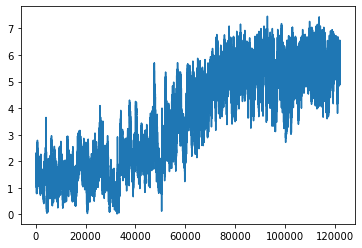

In [1254]:
plt.plot(df1.S2_4)

In [1255]:
import scipy
from scipy import signal


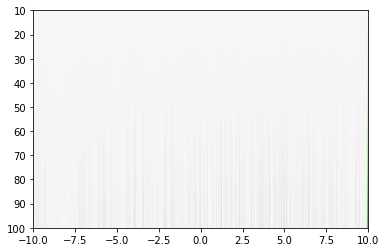

In [1259]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(10, 100)
cwtmatr = signal.cwt(df1.S2_1, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-10, 10, 100, 10], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()